In [5]:
import os
import pandas as pd
import warnings
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import Hindcast_Initialization, FigureDeveloper
import hydroeval as he
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Set working directories
cwd = os.getcwd() 
datapath = f"{os.path.expanduser('~')}/SWEML"
warnings.filterwarnings("ignore")

In [126]:
import importlib
importlib.reload(FigureDeveloper)

<module 'shared_scripts.FigureDeveloper' from '/home/rjohnson18/SWEML/Model/Neural_Network/../shared_scripts/FigureDeveloper.py'>

In [7]:
#Get datetime and corresponding background information to evaluate hindcast
#Need to load predictions2022-09-24.h5, 2019_predictions.h5 (if straight to here and did not make predictions)  

new_year = '2019'
threshold = '20.0'
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
     'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]

Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']

model = 'Neural_Network'


datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list)
EvalDF = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, model)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019
New simulation start files complete
Getting prediction files
Site data processing complete, setting up prediction dataframes...
Finalizing Evaluation dataframes...


In [8]:
FigureDeveloper.Peak_SWE(datelist, EvalDF, Region_list)

,ObsMax,PredMax,ObsMaxDate,PredMaxDate
Region,,,,
Northern Sierra Nevada,139.107333,141.081755,2019-04-02,2019-04-09
Southern Sierra Nevada High,133.996545,146.605839,2019-04-09,2019-04-02
Southern Sierra Nevada Low,100.838,67.059062,2019-03-26,2019-03-26
Greater Yellowstone,32.900471,31.704046,2019-04-16,2019-04-02
Upper Colorado Rockies,51.107474,52.685873,2019-04-16,2019-04-16
SW Montana,46.0756,47.342161,2019-04-16,2019-04-16
San Juan Mountains,55.372,70.143943,2019-04-02,2019-04-16
Great Basin,46.455263,49.150289,2019-03-26,2019-03-12
Northern Wasatch,61.896625,71.77316,2019-04-16,2019-04-16


In [9]:
Model_Results = FigureDeveloper.Dict_2_DF(EvalDF, Region_list)
Model_Results.head()

,y_test,y_pred,Region,Date,y_test_prev,prev_SWE,Long,Lat,elevation_m,WYWeek,northness,VIIRS_SCA,hasSnow,prev_SWE_error,y_pred_fSCA,error
00c4db22-a423-41a4-ada6-a8b1b04153a4,6.858,6.345891,Northern Sierra Nevada,2018-12-11,0.0,3.126142,-121.939413,41.166647,1661.50,10.0,-0.167901,55.500000,True,-1.230765,6.345891,0.512109
018cf1a1-f945-4097-9c47-0c4690538bb5,17.780,11.836120,Northern Sierra Nevada,2018-12-11,0.0,9.369790,-120.618890,39.675880,2057.50,10.0,-0.006909,55.500000,True,-3.688894,11.836120,5.943880
147d5eb4-e574-47e4-994a-8a2908c06050,11.176,10.136005,Northern Sierra Nevada,2018-12-11,0.0,7.414898,-120.879401,39.786417,2013.00,10.0,0.011996,70.166667,True,-2.919251,10.136005,1.039995
6dd37e24-0a9c-4749-8ab6-7e26d42925d6,10.160,7.324366,Northern Sierra Nevada,2018-12-11,0.0,4.214518,-121.786700,40.780052,1787.00,10.0,-0.191108,56.500000,True,-1.659259,7.324366,2.835634
76b55900-eb3d-4d25-a538-f74302ffe72d,15.494,17.716959,Northern Sierra Nevada,2018-12-11,0.0,13.316327,-120.178716,41.993149,2261.25,10.0,0.039906,100.000000,True,-5.242649,17.716959,-2.222959


In [10]:
#put all regions together for basic metrics
allregions = pd.DataFrame()
for region in EvalDF.keys():
    allregions = pd.concat([allregions, EvalDF[region]])
    
y_pred = allregions['y_pred_fSCA']
y_test = allregions['y_test']
    
kge, r, alpha, beta = he.evaluator(he.kge, y_pred, y_test)
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared = False)
pbias = he.evaluator(he.pbias, y_pred, y_test)


print('There are ', len(allregions), ' hindcast evaluation obs')
print('All regions KGE is: ', kge[0])
print('All regions rmse is: ', rmse)
print('All regions pbias is: ', pbias[0])


There are  6212  hindcast evaluation obs
All regions KGE is:  0.8318993092100895
All regions rmse is:  16.575552008670147
All regions pbias is:  5.696369570742343


In [11]:
Maritime_Region, Prairie_Region, Alpine_Region, Snow_Class = FigureDeveloper.Sturm_Classified_Performance(Model_Results)

Maritime  RMSE:  26.199137770033982  R2:  0.6820441244066424 pbias: [17.498795]
Alpine  RMSE:  11.839739127995184  R2:  0.7328582984587237 pbias: [0.32024751]
Prairie  RMSE:  11.693965598756499  R2:  0.7146063270424805 pbias: [-4.90691345]


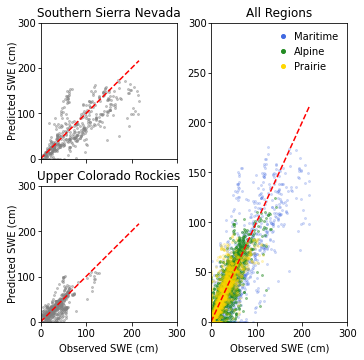

In [12]:
FigureDeveloper.Slurm_Class_parity(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region)

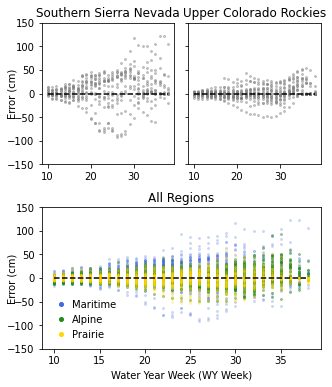

In [13]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region, 'WYWeek', 'error', 'Water Year Week (WY Week)', 'Error (cm)', 'ErrorVsWYWeek', 2)

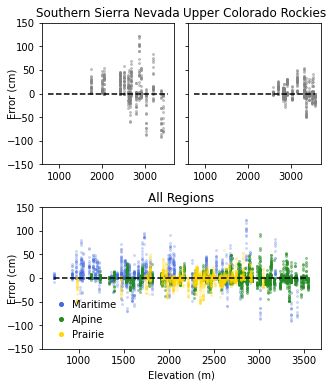

In [14]:
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region,'elevation_m', 'error', 'Elevation (m)', 'Error (cm)', 'ErrorVsElevation', 2)

['NW Rockies', 'Northern Colorado Rockies', 'Northern Wasatch', 'Upper Colorado Rockies']


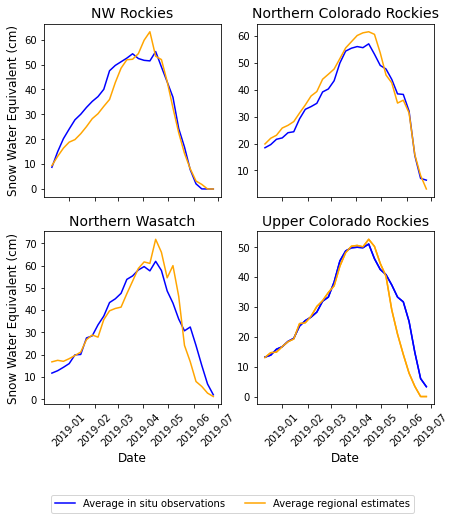

In [15]:
Regions = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','N_Co_Rockies']
name = 'Alpine'
FigureDeveloper.SWE_TS_plot(datelist, EvalDF, Regions, name)

['Northern Sierra Nevada', 'Southern Sierra Nevada High', 'Southern Sierra Nevada Low', 'Southern Cascades', 'SW Montana', 'Great Basin', 'SW Utah', 'Sawtooth', 'NW Rockies', 'Northern Colorado Rockies', 'Northern Wasatch', 'Upper Colorado Rockies']


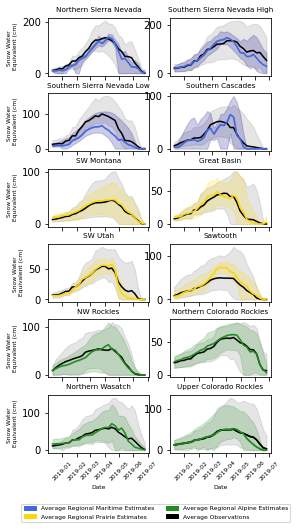

In [84]:
Maritime = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','S_Cascade']
Prarie = [ 'SW_Mont', 'GBasin', 'S_Wasatch','Sawtooth']
Alpine = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','N_Co_Rockies']

plotname = 'All_Regions_TS'
RegionDict, RegionAll = FigureDeveloper.SWE_TS_plot_classes(datelist, EvalDF, Maritime, Prarie, Alpine, plotname, fontsize = 6, opacity=0.1)

#can we shade the ranges for pred & obs?

processing predictions into geodataframe


100%|██████████| 1/1 [00:00<00:00, 45.42it/s]


creating figures for each prediction timestep


  0%|          | 0/1 [00:00<?, ?it/s]

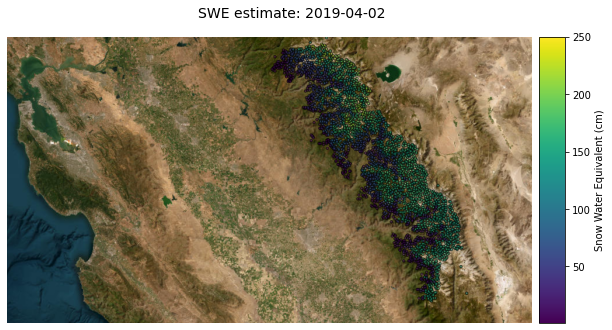

100%|██████████| 1/1 [00:08<00:00,  8.78s/it]


In [18]:

Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low']
#Get list of optional tiles here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
variant = 'World_Imagery'#   'World_Physical_Map'
date = ["2019-04-02"]
FigureDeveloper.SSM_Fig(date, Region_list,variant)

In [104]:
EvalDF.keys()

dict_keys(['N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'])

In [111]:
#make snow class cdfs
import hydroeval as he

Maritime_Region = ['Southern Sierra Nevada High','Southern Sierra Nevada Low', 'Northern Sierra Nevada','Southern Cascades',
                      'Northern Cascades', 'California Coast Range', 'Washington Coast Range ', 
                      'Oregon Coast Range']

Prairie_Region  =  ['Elkhorn Mountains of Montana ','SW Montana', 'Great Basin', 'SW Utah', 'Sawtooth', 'SW Desert']

Alpine_Region =['Blue Mountains of Oregon', 'Northern Wasatch', 'NW Rockies', 'Greater Yellowstone', 'Upper Colorado Rockies','Northern Colorado Rockies', 'San Juan Mountains',
                        'Northern Rockies', 'Sangre de Cristo Mountains']


In [118]:
def slurmNSE(df, slurm_class):
    regionsNSE = []
    for region in EvalDF.keys():
        sites = EvalDF[region].index.unique()

        NSE = []
        cols = ['y_test', 'y_pred']
        for site in sites:
            sitedf = EvalDF[region][EvalDF[region].index ==site][cols]
            #0's are causing issues
            sitedf['y_pred'][sitedf['y_pred']<0.1]=0.1
            sitedf['y_test'][sitedf['y_test']<0.1]=0.1
            #display(sitedf.head(40))
            sitense = he.nse(sitedf['y_pred'].values,sitedf['y_test'].values)
            NSE.append(sitense)
            #change values less than 0 to 0
            NSE = [0 if b < 0 else b for b in NSE]
        regionsNSE = regionsNSE + NSE
        regionsNSE.sort()
        
    return regionsNSE

In [127]:
MaritimeNSE = FigureDeveloper.slurmNSE(EvalDF, Maritime_Region)
PrarieeNSE = FigureDeveloper.slurmNSE(EvalDF, Prairie_Region)
AlpineNSE = FigureDeveloper.slurmNSE(EvalDF, Alpine_Region)

KeyError: 'Southern Sierra Nevada High'

In [122]:
for region in Region_list:
        if region == 'N_Sierras':
            EvalDF[region]['Region'] = 'Northern Sierra Nevada'
        elif region == 'S_Sierras_High':
            EvalDF[region]['Region'] = 'Southern Sierra Nevada High'
        elif region == 'S_Sierras_Low':
            EvalDF[region]['Region'] = 'Southern Sierra Nevada Low'
        elif region == 'Greater_Yellowstone':
            EvalDF[region]['Region'] = 'Greater Yellowstone'
        elif region == 'N_Co_Rockies':
            EvalDF[region]['Region'] = 'Upper Colorado Rockies'
        elif region == 'SW_Mont':
            EvalDF[region]['Region'] = 'SW Montana'
        elif region == 'SW_Co_Rockies':
            EvalDF[region]['Region'] = 'San Juan Mountains'
        elif region == 'GBasin':
            EvalDF[region]['Region'] = 'Great Basin'
        elif region == 'N_Wasatch':
            EvalDF[region]['Region'] = 'Northern Wasatch'
        elif region == 'N_Cascade':
            EvalDF[region]['Region'] = 'Northern Cascades'
        elif region == 'S_Wasatch':
            EvalDF[region]['Region'] = 'SW Utah'
        elif region == 'SW_Mtns':
            EvalDF[region]['Region'] = 'SW Desert'
        elif region == 'E_WA_N_Id_W_Mont':
            EvalDF[region]['Region'] = 'NW Rockies'
        elif region == 'S_Wyoming':
            EvalDF[region]['Region'] = 'Northern Colorado Rockies'
        elif region == 'SE_Co_Rockies':
            EvalDF[region]['Region'] = 'Sangre de Cristo Mountains'
        elif region == 'Ca_Coast':
            EvalDF[region]['Region'] = 'California Coast Range'
        elif region == 'E_Or':
            EvalDF[region]['Region'] = 'Blue Mountains of Oregon'
        elif region == 'N_Yellowstone':
            EvalDF[region]['Region'] = 'Elkhorn Mountains of Montana '
        elif region == 'S_Cascade':
            EvalDF[region]['Region'] = 'Southern Cascades'
        elif region == 'Wa_Coast':
            EvalDF[region]['Region'] = 'Washington Coast Range '
        elif region == 'Greater_Glacier':
            EvalDF[region]['Region'] = 'Northern Rockies'
        elif region == 'Or_Coast':
            EvalDF[region]['Region'] = 'Oregon Coast Range'

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.009162509170939193,
 0.012752972727851697,
 0.04689300311388378,
 0.12910855969479096,
 0.14348065889218176,
 0.1561334305540928,
 0.16664742760555962,
 0.1820825245435811,
 0.19895007500824657,
 0.2204173538613079,
 0.2298225969818385,
 0.23297211466392842,
 0.233901402117629,
 0.25307842409412995,
 0.26746801111890395,
 0.27577318896216985,
 0.28294884935904907,
 0.29461909621936255,
 0.30694599216439755,
 0.306961341611098,
 0.31354345023334207,
 0.33388001094640984,
 0.33394133175622376,
 0.3345045532646769,
 0.34546704030720843,
 0.3682697489940967,
 0.3767216442150546,
 0.38705954523543806,
 0.3877383084210805,
 0.3898640824352463,
 0.40164238975801114,
 0.40844237850795007,
 0.41488326015165133,
 0.4160168622124547,
 0.42290184925260144,
 0.4239366240618747,
 0.4289630210530774,
